In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import dia_array
from scipy.sparse.linalg import eigs

from interaction import potential
from counterterm import local_LO_counterterm
from finite_differences import second_order_deriv
from constants import MU, BETA4

plt.style.use('science')

In [3]:
rgf = np.loadtxt('rgflow_local_lo_a0_fix_hp_n_14_coord_ir_corrected.txt')

In [4]:
index = 0
Ri, gi = rgf[index]

In [5]:
mm_spec = np.loadtxt('spectra_Mott_Massey_hp.txt')

In [6]:
def bound_state_spectrum(R, g, lower_limit, upper_limit, nr):
    '''
    Computes the binding energies of the π-H system given
              R : coordinate-space cutoff
              g : LO counterterm coupling
    lower_limit : smallest r value used for the Schrödinger Equation
    upper_limit : largest r value used for SE
             nr : number of r values used for SE
    '''
    pot = lambda r: potential(r, R) + g*local_LO_counterterm(r, R)

    rs = np.linspace(lower_limit, upper_limit, nr)
    dr = rs[1] - rs[0]
    dr

    d2 = second_order_deriv(nr, dr)

    v = pot(rs)

    evals, evecs = np.linalg.eig(-d2/(2*MU) + np.diag(v))
    ii = np.intersect1d(
        np.where(evals.real < 0)[0],
        np.where(evals.imag == 0)[0]
    )
    return np.sort(evals[ii].real)

In [11]:
shallow_states = []
r_min = 1e-4
r_max = 1000

for n in np.arange(50, 501, 10):
    rs = np.linspace(r_min, r_max, n)
    dr = rs[1] - rs[0]

    d2 = second_order_deriv(n, dr, sparse=False)

    pot = lambda r: potential(r, Ri) + gi*local_LO_counterterm(r, Ri)
    v = dia_array((pot(rs), [0]), shape=(n, n))
#     v = np.diag(pot(rs))

    evals, evecs = eigs(-d2/(2*MU) + v, sigma=-1.2e-4)
#     evals, evecs = np.linalg.eig(-d2/(2*MU) + v)
    
    ii_bound_states = np.where(np.logical_and(evals.real < 0, evals.imag == 0))[0]
    ii = np.argsort(evals[ii_bound_states])
    
    shallow_states.append([n, evals[ii].real, evecs[:, ii].real])

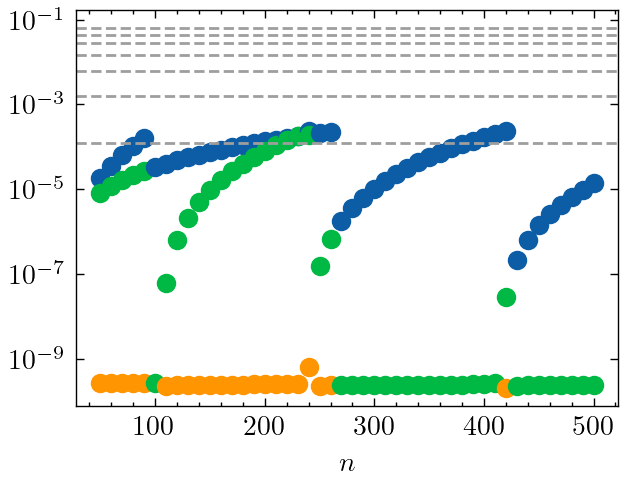

In [12]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for x in shallow_states:
    for (i, y) in enumerate(x[1]):
        ax.scatter(x[0], np.abs(y), color=f'C{i}')

for b2 in np.abs(mm_spec):
    ax.axhline(b2, color='C6', linestyle='--')

ax.set_yscale('log')
ax.set_xlabel('$n$');

In [1]:
fig, ax = plt.subplots(2, figsize=(4, 6), dpi=200)
fig.patch.set_facecolor('white')

for x in shallow_states:
    rs = np.linspace(r_min, r_max, x[0])
    evecs = x[2]
    for (i, y) in enumerate(evecs.T):
        ax[i].plot(rs, y, color=f'C{i}', alpha=0.1)

ax[0].set_xscale('log')
# ax[1].set_xscale('log')
ax[0].set_ylabel(r'$u$')
ax[1].set_xlabel(r'$r$');

NameError: name 'plt' is not defined

In [ ]:
evals, evecs = eigs(-d2/(2*MU) + v, k=14, v0=evecs[:, -1].real)

np.sort(
    evals[
        np.where(np.logical_and(evals.real < 0, evals.imag == 0))[0]
    ].real
)

In [ ]:
bound_state_spectrum(Ri, gi, r_min, r_max, n)